<a href="https://colab.research.google.com/github/bikash-bhoi/EIP4/blob/master/Session13B_Custom_YoloV3_2_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Copy the files from Drive
%%bash
rm  /content/gdrive/My\ Drive/Yolo_Files/Yolov3_Custom_training/YoloV3/output/*
rm  /content/gdrive/My\ Drive/Yolo_Files/Yolov3_Custom_training/YoloV3/output_box/*
cp -r /content/gdrive/My\ Drive/Yolo_Files/Yolov3_Custom_training/* .

In [13]:
!ls /content/YoloV3/data/customdata/images/ | wc -l

1097


In [15]:
!ls /content/YoloV3/video_in/

StarWarsDroidsAtTheOscars.mp4


In [25]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [26]:
ls

gdrive/  sample_data/  YoloV3/


In [27]:
cd YoloV3/

/content/YoloV3


In [28]:
!ls

 annotation_tool     output	    results.txt       'ubdivisions=1'
 bb8_detection.mp4   output_box     test_batch0.png    utils
 cfg		     __pycache__    test.py	       video_in
 data		     README.md	    ting	       video_out
 detect.py	     results.json   train_batch0.png   vim.exe.stackdump
 models.py	     results.png    train.py	       weights


In [29]:
!cat data/customdata/custom.data

classes=2
train=data/customdata/custom.txt
valid=data/customdata/custom.txt
names=data/customdata/custom.names


In [34]:
!cat data/customdata/custom.txt | wc -l
!ls data/customdata/images| wc -l
!ls data/customdata/labels| wc -l

1096
1097
1097


In [35]:
!cat data/customdata/custom.names

BB8
R2D2

In [0]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

2020-04-25 01:05:31.246180: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 6842.26it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 115.98it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 8120.63it/s]

In [36]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 100 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=100, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-25 17:44:56.287997: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25787e+07 parameters, 6.25787e+07 gradients
Caching labels (1096 found, 0 missing, 1 empty, 0 duplicate, for 1097 images): 100% 1097/1097 [00:00<00:00, 10043.59it/s]
Caching images (0.6GB): 100% 1097/1097 [00:02<00:00, 516.76it/s]
Reading image shapes: 100% 1097/1097 [00:00<00:00, 6530.70it/s]
Caching labels (

In [62]:
%%bash
##extract Frames from video
ffmpeg -i /content/YoloV3/video_in/StarWarsDroidsAtTheOscars.mp4 /content/YoloV3/output/image%3d.jpg

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [43]:
##extract audio from video
!ffmpeg -i /content/YoloV3/video_in/StarWarsDroidsAtTheOscars.mp4 -vn -ar 44100 -ac 2 -ab 192 -f mp3 /content/YoloV3/video_in/audio.mp3


ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [63]:
##Detect Images with Box
!python detect.py --conf-thres 0.05 --source output --output output_box

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.05, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='output_box', save_txt=False, source='output', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25787e+07 parameters, 6.25787e+07 gradients
image 1/642 output/image001.jpg: 320x512 1 R2D2s, Done. (0.017s)
image 2/642 output/image002.jpg: 320x512 1 R2D2s, Done. (0.016s)
image 3/642 output/image003.jpg: 320x512 1 R2D2s, Done. (0.016s)
image 4/642 output/image004.jpg: 320x512 1 R2D2s, Done. (0.016s)
image 5/642 output/image005.jpg: 320x512 1 R2D2s, Done. (0.016s)
image 6/642 output/image006.jpg: 320x512 1 R2D2s, Done. (0.016s)
image 7/642 output/image007.jpg: 320x512 1 R2D2s, Done. (0.016s)
image 8/642 output/image008.jpg: 320x512 1 R2D2s, Done. (0.016s)
image 9

In [52]:
##Stitch images to video
!ffmpeg -i /content/YoloV3/output_box/image%3d.jpg /content/YoloV3/video_out/Output_video.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [56]:
## add audio to object detected video
!ffmpeg -i /content/YoloV3/video_in/audio.mp3 -i /content/YoloV3/video_out/Output_video.mp4 /content/YoloV3/video_out/StarWarsDroidsAtTheOscars_Yolo_Detection.mp4


ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
from google.colab import files
files.download('/content/YoloV3/video_out/StarWarsDroidsAtTheOscars_Yolo_Detection.mp4')

In [0]:
%%bash

##Copy output files to drive and Download the video
cp /content/YoloV3/video_out/* /content/gdrive/My\ Drive/Yolo_Files/Yolov3_Custom_training/YoloV3/video_out/
cp /content/YoloV3/output_box/* /content/gdrive/My\ Drive/Yolo_Files/Yolov3_Custom_training/YoloV3/output_box/
cp /content/YoloV3/weights/last.pt /content/gdrive/My\ Drive/Yolo_Files/Yolov3_Custom_training/YoloV3/weights/


In [0]:
!cp /content/YoloV3/weights/last.pt /content/gdrive/My\ Drive/Yolo_Files/Yolov3_Custom_training/YoloV3/weights/

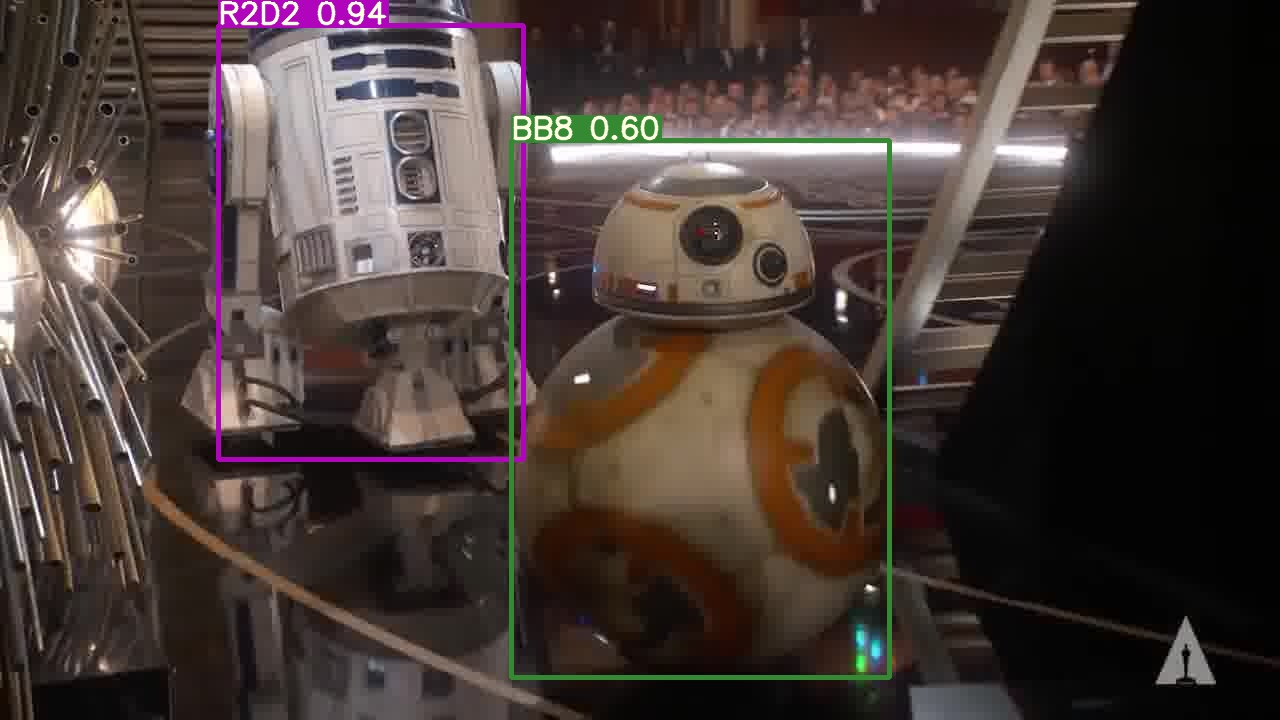

In [47]:
Image(filename='output_box/image443.jpg', width=600)

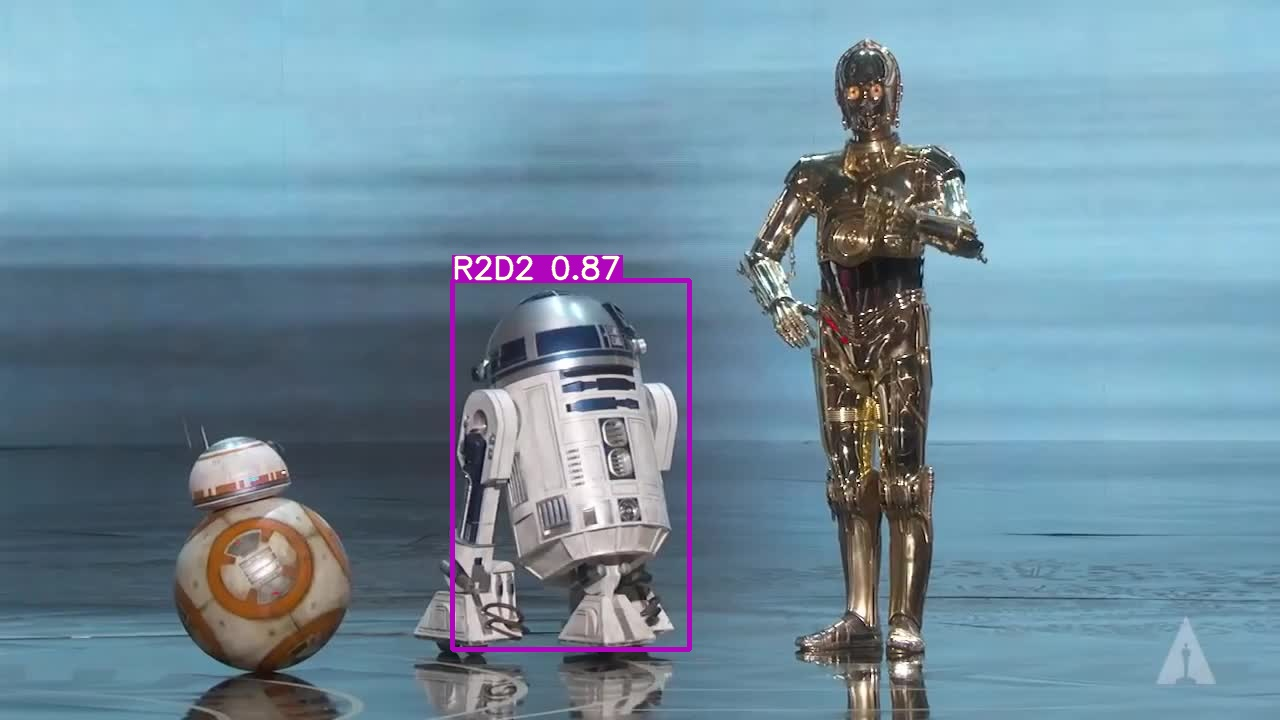

In [48]:
Image(filename='output_box/image001.jpg', width=600)

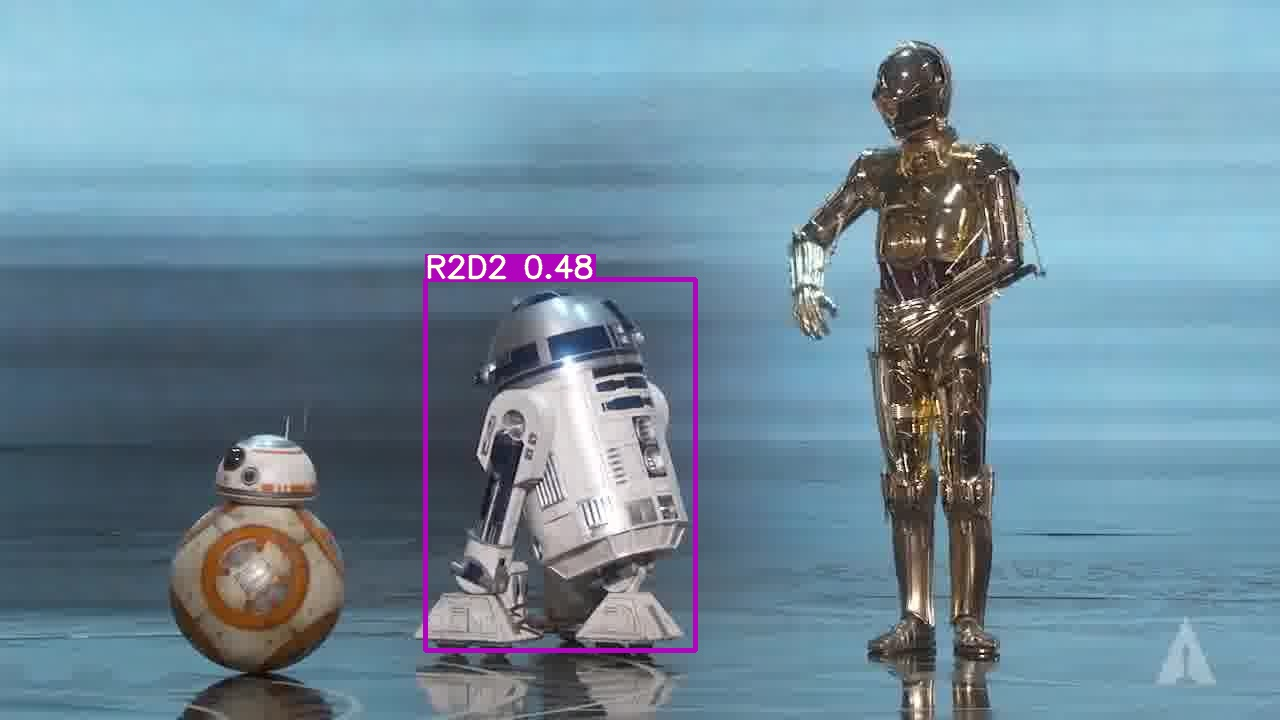

In [49]:
Image(filename='output_box/image190.jpg', width=600)